In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np
import xarray as xr
import pop_tools
import operators

In [75]:
ds = pop_tools.get_grid('POP_gx1v7')

nk, nj, ni = ds.sizes['z_t'], ds.sizes['nlat'], ds.sizes['nlon']

ones3d = xr.DataArray(
    np.ones((12, nk, nj, ni)), 
    dims=('time', 'z_t', 'nlat', 'nlon'),
)

# make 3D array of 0:km
zero_to_km = xr.DataArray(np.arange(0, nk), dims=('z_t'))
ZERO_TO_KM = (zero_to_km * ones3d)

# mask out cells where k is below KMT
valid = ZERO_TO_KM.where(ZERO_TO_KM < ds.KMT)
valid = xr.where(valid.notnull(), True, False)
var_3d = ones3d.where(valid)

ds['var_surface'] = ones3d.isel(z_t=0)
ds['var_k10'] = ones3d.isel(z_t=10)
ds['var_k30'] = ones3d.isel(z_t=30)
ds['var_3d'] = var_3d

test_vars = [v for v in ds.data_vars if 'var_' in v]
ds = ds[['KMT', 'TAREA', 'REGION_MASK',]+test_vars]
ds

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, time: 12, z_t: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: nlat, nlon, time
Data variables:
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    TAREA        (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.432e+12
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    var_surface  (time, nlat, nlon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    var_k10      (time, nlat, nlon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    var_k30      (time, nlat, nlon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    var_3d       (time, z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan
Attributes:
    lateral_dims:       [384, 320]
    vertical_dims:      60
    vert_grid_file:     gx1v7_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/gx1v7/grid/horiz_grid_20010402.ieeer8
    topography_fname:   inputdata/ocn/pop/gx1v7/grid/topography_20161215.ieeei4
    region_mask_fname:  inputdata/ocn/pop/gx1v7/grid/region_mask_20151008.ieeei4
    type:               dipole
    title:              POP_gx1v7 grid

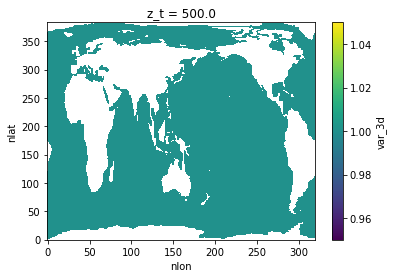

In [64]:
ds.var_3d.isel(time=0, z_t=0).plot()

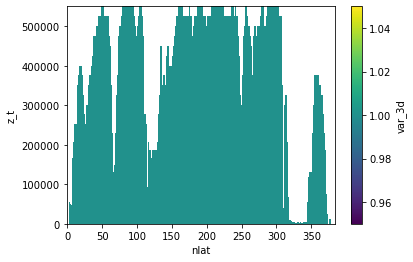

In [65]:
ds.var_3d.isel(time=0, nlon=200).plot()

In [68]:
dso = operators.global_mean(ds)
for v in test_vars:
    np.testing.assert_allclose(dso[v].values, 1.)
dso

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, time: 12, z_t: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: nlat, nlon, time
Data variables:
    var_surface  (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    var_k10      (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    var_k30      (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    var_3d       (time, z_t) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    TAREA        (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.432e+12